# A3C
## Review-Policy Gradient
在之前我们已经提到PG算法的更新过程为：
$$\nabla \overline{R}_{\theta} \approx \frac{1}{N}\sum_{n=1}^N\sum_{t=1}^{T_n}(\sum_{t^{'}=t}^{T_n}\lambda^{t^{'}-t}r^n_{t^{'}}-b)\nabla logp_{\theta}(a^n_t|s^n_t)$$  
我们定义$\sum_{t^{'}=t}^{T_n}\lambda^{t^{'}-t}r^n_{t^{'}} = G^n_t$，由于训练过程中存在很多随机性，因此该值非常不稳定，我们需要进行大量的抽样才能得到比较合适的值。  
## Review-Q-Learning  
状态函数$V^{\pi}(s)$和状态动作函数$Q^{\pi}(s,a)$，通常采用TD算法或MC算法来进行求解。  
## Actor-Critic  
$G_n_t$通过与环境的交互获得，根据其定义和Q函数的定义，可以得到$E[G^n_t] = Q^{\pi_{\theta}}(s^n_t,a^n_t)$，而基线$b = V^{\pi_{\theta}}(s^n_t)$，因此可以得到：
$$\nabla \overline{R}_{\theta} \approx \frac{1}{N}\sum_{n=1}^N\sum_{t=1}^{T_n}(Q^{\pi_{\theta}}(s^n_t,a^n_t) - V^{\pi_{\theta}}(s^n_t))\nabla logp_{\theta}(a^n_t|s^n_t)$$  
## Advantage Actor-Critic  
上述提到的目标函数我们需要同时去训练V网络和Q网络，为了减少训练的网络数目，令：
$$Q^{\pi} = E[r^n_t+V^{\pi}(s^n_{t+1})] = r^n_t+V^{\pi}(s^n_{t+1})$$  
因此，此时我们就只需要去训练V网络即可。  
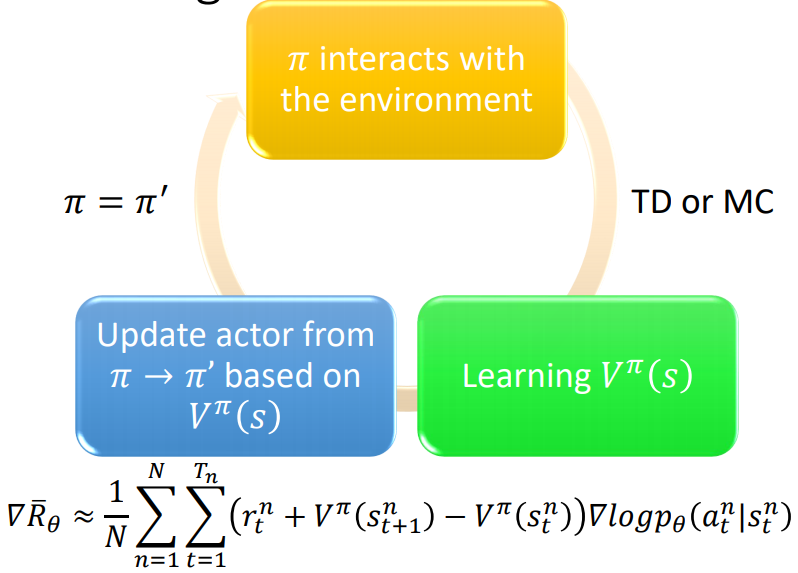  
在该过程中，我们要训练Actor网络和Critic网络，这两个网络的输入都是s，因此可以使这两个网络共享一部分网络层。  
我们使用输出actor的熵来对Actor网络进行正则化，这样可以使actor采取不同动作的机率相近，从而对不同的动作进行exploration。  
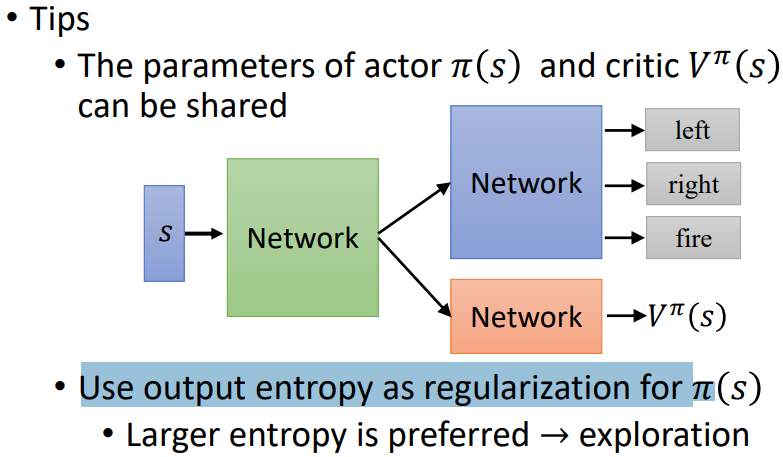  
A3C算法基本思路与上述相同，只是充分利用了机器的CPU，使每个CPU同步进行训练，然后一个主线程控制更新。  
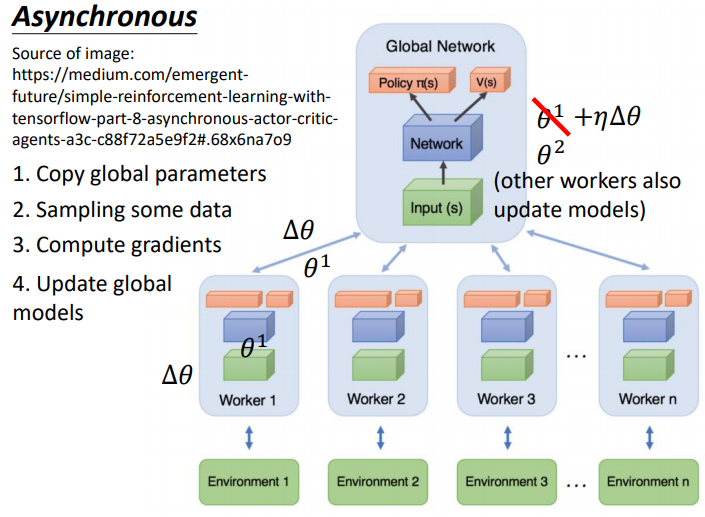  
# Pathwise Derivative Policy Gradient  
在原始的Actor-Critic中，Critic只会告诉Actor该动作是好还是不好，而在Pathwise Derivative Policy Gradient中，Critic会告诉Critic应该采取什么动作好。  
当Actor采取的a为连续向量时，我们很难直接计算$a=\arg\max_{a}Q(s,a)$，因此我们将这个问题认为是一个优化问题。利用梯度上升法$\theta^{\pi^{'}} \leftarrow \theta^{\pi} + \eta \nabla_{\theta^{\pi}}Q^{\pi}(s,a)$  
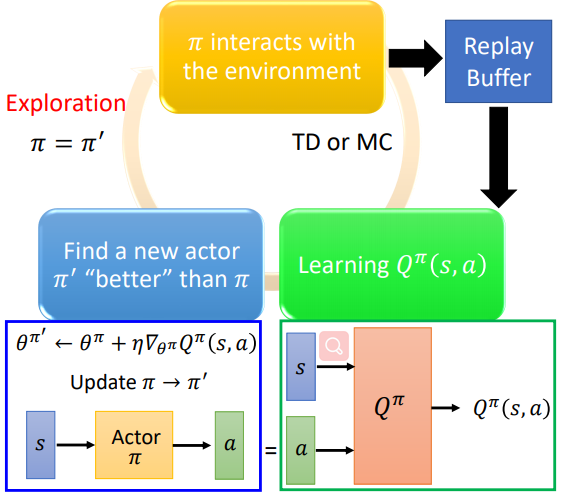  
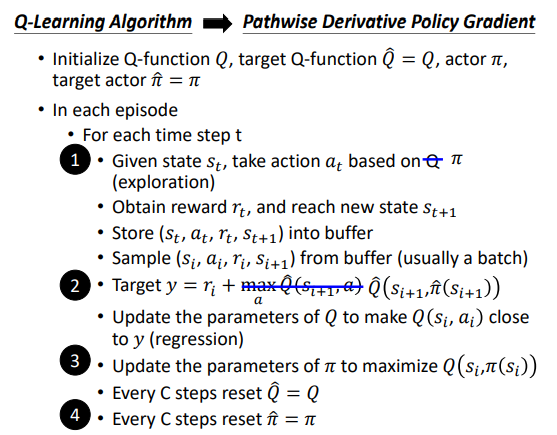